<a href="https://colab.research.google.com/github/aum2606/machine-learning-projects/blob/main/flipkart-sentiment/flipkartSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/flipkart_data.csv')

In [7]:
data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [8]:
data['rating'].value_counts()

,count
rating,
5,5726
4,2365
3,884
1,691
2,310


<Axes: xlabel='rating', ylabel='count'>

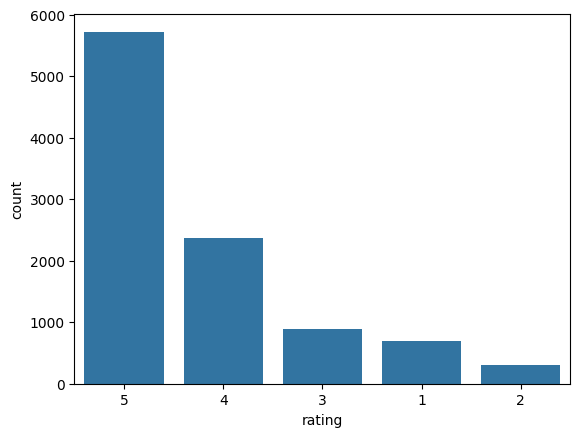

In [10]:
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)

In [12]:
pos_neg_rating = []
for i in range(len(data['rating'])):
  if data['rating'][i]>=5:
    pos_neg_rating.append(1)
  else:
    pos_neg_rating.append(0)
data['label'] = pos_neg_rating

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from tqdm import tqdm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
import re
def preprocessing_text(text):
  preprocessed_text = []
  for sentence in tqdm(text):
    sentence = re.sub(r'[^\w\s]','',sentence)
    preprocessed_text.append(' '.join(token.lower()
                            for token in nltk.word_tokenize(sentence)
                            if token.lower() not in stopwords.words('english')))
  return preprocessed_text

In [16]:
preprocessed_review = preprocessing_text(data['review'].values)
data['review'] = preprocessed_review

100%|██████████| 9976/9976 [00:29<00:00, 336.73it/s]


In [17]:
data

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1
...,...,...,...
9971,goodread,5,1
9972,everything amazimg built lightread,5,1
9973,goodread,5,1
9974,best headphone ever usedread,5,1


In [19]:
from wordcloud import WordCloud

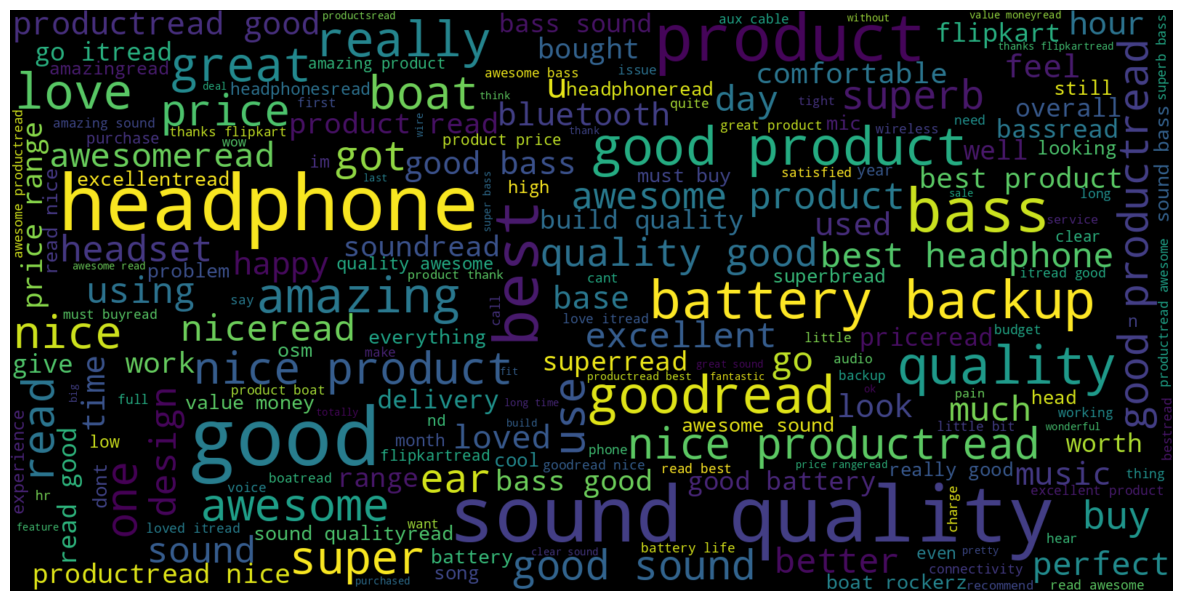

In [20]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,data['label'],test_size=0.20,stratify=data['label'],random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7882
- F1 score: 0.7824
- Precision: 0.7677
- Recall: 0.9048
- Roc Auc Score: 0.7680
----------------------------------
Model performance for Test set
- Accuracy: 0.7510
- F1 score: 0.7423
- Precision: 0.7340
- Recall: 0.8883
- Roc Auc Score: 0.7271


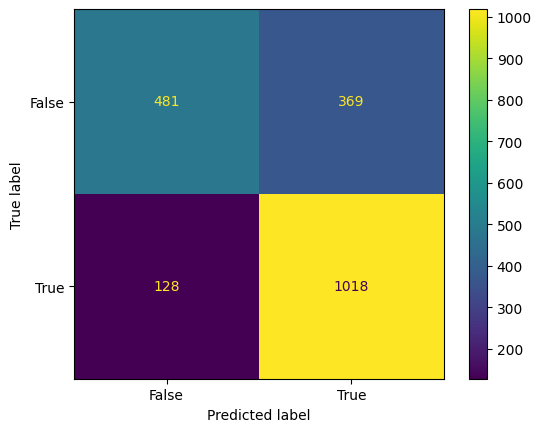



Decision Tree
Model performance for Training set
- Accuracy: 0.9209
- F1 score: 0.9199
- Precision: 0.8917
- Recall: 0.9814
- Roc Auc Score: 0.9104
----------------------------------
Model performance for Test set
- Accuracy: 0.6789
- F1 score: 0.6717
- Precision: 0.6909
- Recall: 0.7976
- Roc Auc Score: 0.6582


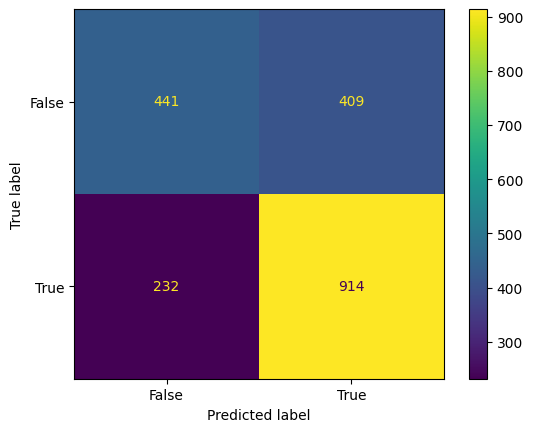



Random Forest
Model performance for Training set
- Accuracy: 0.9209
- F1 score: 0.9197
- Precision: 0.8860
- Recall: 0.9895
- Roc Auc Score: 0.9090
----------------------------------
Model performance for Test set
- Accuracy: 0.7385
- F1 score: 0.7305
- Precision: 0.7284
- Recall: 0.8682
- Roc Auc Score: 0.7159


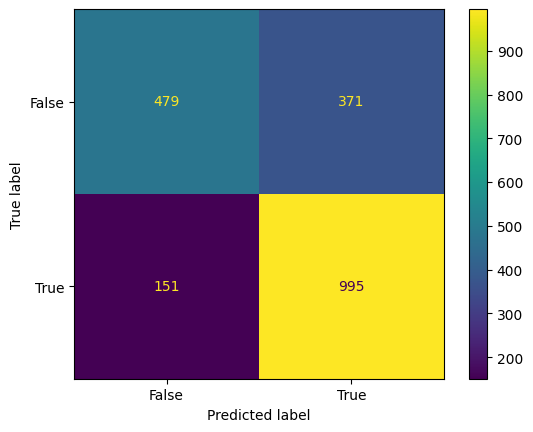



Gradient Boost
Model performance for Training set
- Accuracy: 0.7425
- F1 score: 0.7214
- Precision: 0.7033
- Recall: 0.9535
- Roc Auc Score: 0.7059
----------------------------------
Model performance for Test set
- Accuracy: 0.6964
- F1 score: 0.6678
- Precision: 0.6702
- Recall: 0.9276
- Roc Auc Score: 0.6561


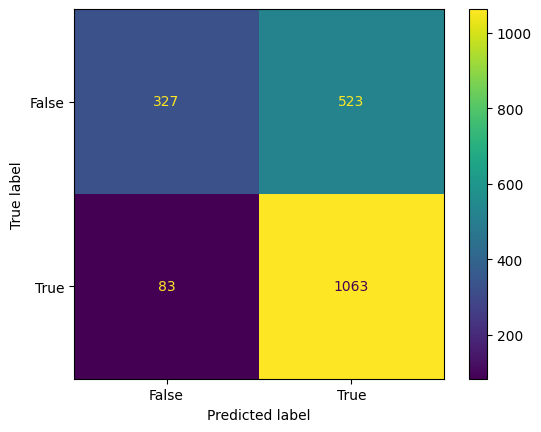

In [30]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) #  Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') #  F1-score
    model_train_precision = precision_score(y_train, y_train_pred) #  Precision
    model_train_recall = recall_score(y_train, y_train_pred) #  Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    model_test_accuracy = accuracy_score(y_test, y_test_pred) #  Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') #  F1-score
    model_test_precision = precision_score(y_test, y_test_pred) #  Precision
    model_test_recall = recall_score(y_test, y_test_pred) #  Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) # Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    cm = confusion_matrix(y_test,y_test_pred)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                                display_labels = [False, True])

    cm_display.plot()
    plt.show()


    print('='*35)
    print('\n')